https://github.com/DanielJCase/Ising-Deep-Learning/blob/master/Ising_genData.ipynb

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [19]:
def createArray(L):
    mat = np.random.randint(0,2,size=(L,L), dtype=int)
    mat[mat==0] = -1 
    return mat

In [25]:
def get_neighbour_sum_matrix(mat):
    right = (1, 1)
    left = (-1, 1)
    up = (-1, 0)
    down = (1, 0)
    u_r = ((-1, 1), (0, 1))
    d_r = ((1, 1), (0, 1))
    u_l = ((-1, -1), (0, 1))
    d_l = ((1, -1), (0, 1))
    shift_axis_list = [right, left, u_r, d_r, u_l, d_l, up, down]
    return sum([np.roll(mat, shift=shift_axis[0], axis=shift_axis[1]) for shift_axis in shift_axis_list])

def calcEnergy(mat):
    '''Energy of a given configuration'''
    energy = 0
    matrix_sum = get_neighbour_sum_matrix(mat)
    for i in range(len(mat)):
        for j in range(len(mat)):
            spin = mat[i,j]
            energy += -matrix_sum * spin
    return energy

def calcMag(mat):
    '''Magnetization of a given configuration'''
    mag = np.sum(mat)
    return mag

In [26]:
def iterate(mat,T):
    """
    Parameters:
        mat: numpy array containing the current spin configuration
        T: Temperature for the simulation
        calcE: Flag to calculate and return the average spin energy for the final configuration.
    """
    L,_ = mat.shape
      
    order1 = np.arange(L)
    order2 = np.arange(L)
    np.random.shuffle(order1)
    np.random.shuffle(order2)

    for i in order1:
        for j in order2:
            spin_current = mat[i,j]
            spin_new = spin_current*(-1)
            neighbour_sum = mat[(i+1)%L,j]+mat[(i-1)%L,j]+mat[i,(j+1)%L]+mat[i,(j-1)%L]
            E_current = -spin_current*neighbour_sum
            E_new = -spin_new*neighbour_sum
            E_diff = E_new - E_current
            if E_diff < 0:
                mat[i,j] = spin_new
            elif np.random.random()<= np.exp(-float(E_diff)/T):
                mat[i,j] = spin_new


def simulate(mat,T,steps):
    for _ in range(steps):
        iterate(mat,T)


In [32]:
def generateSamples(T,L,steps,samples,dirPath):
    """
    Parameters:
        T: Temperature
        L: Linear lattice size
        steps: Number of simulation steps
        sample: Number of configuration steps
        dirPath: save location
    """
    for i in range(1,samples+1):
        mat = createArray(L)
        simulate(mat,T,steps)
        
        if T<2.27:
            category = "low"
        else:
            category = "high"
        
        path = os.path.join(dirPath,category)
        os.makedirs(path, exist_ok=True)
        np.save(os.path.join(path,f"{category}_{T:.2f}_{i}_"),mat)

In [33]:
generateSamples(1, 64, 1000, 1, "Data")

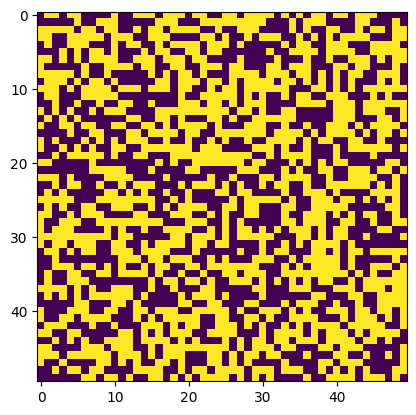

In [28]:
mat=createArray(50)
plt.imshow(mat)

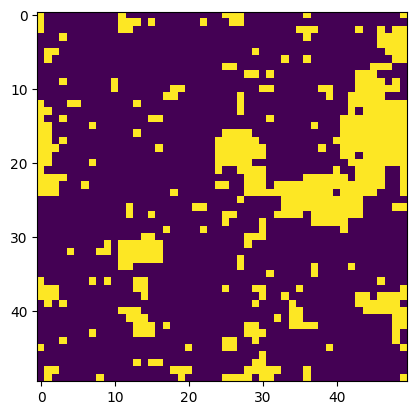

In [29]:
simulate(mat,2.3,3000)
plt.imshow(mat)

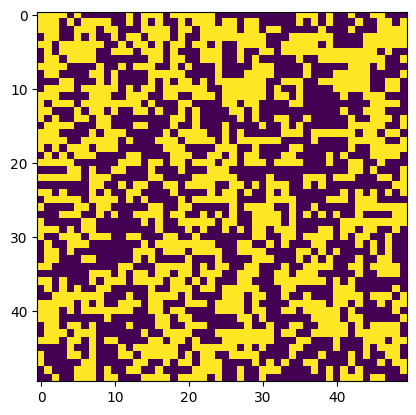

In [30]:
mat=createArray(50)
simulate(mat,9.3,3000)
plt.imshow(mat)